In [52]:
! pip install -r requirements.txt -q
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
# from langchain.agents import create_pandas_dataframe_agent
from langchain.llms import OpenAI
from langchain.agents.agent_types import AgentType
from langchain.chat_models import ChatOpenAI
from dotenv import load_dotenv,find_dotenv
import pandas as pd
import scipy.stats as stats


In [6]:
! pip install langchain-experimental

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.4/159.4 kB 3.4 MB/s eta 0:00:00


In [7]:
from langchain_experimental.agents.agent_toolkits import create_pandas_dataframe_agent

In [8]:
import os
from dotenv import load_dotenv,find_dotenv

In [9]:
load_dotenv(find_dotenv(),override=True)

True

In [10]:
bmi_df = pd.read_csv('bmi.csv')

In [11]:
bmi_df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [12]:
agent = create_pandas_dataframe_agent(OpenAI(temperature=0),
                                      bmi_df,
                                      verbose=True)

In [13]:
openai = OpenAI(temperature=0.0)

In [14]:
results = agent("how many records are there?")



> Entering new AgentExecutor chain...
Thought: I need to count the number of records
Action: python_repl_ast
Action Input: len(df)
Observation: 500
Thought: I now know the final answer
Final Answer: There are 500 records.

> Finished chain.


In [15]:
bmi_df.shape

(500, 4)

In [16]:
agent("how many rows and how many columns are there?")



> Entering new AgentExecutor chain...
Thought: I need to count the rows and columns
Action: python_repl_ast
Action Input: df.shape
Observation: (500, 4)
Thought: I now know the final answer
Final Answer: There are 500 rows and 4 columns.

> Finished chain.


{'input': 'how many rows and how many columns are there?',
 'output': 'There are 500 rows and 4 columns.'}

In [20]:
results = agent("sample 3 records and display")



> Entering new AgentExecutor chain...
Thought: I need to sample 3 records from the dataframe
Action: python_repl_ast
Action Input: df.sample(3)
Observation:      Gender  Height  Weight  Index
2    Female     185     110      4
85     Male     198      50      0
319    Male     152     141      5
Thought:

RateLimitError: ignored

In [21]:
results = agent("Are there any missing values in the dataset?")



> Entering new AgentExecutor chain...
Thought: I need to check if any of the values are null
Action: python_repl_ast
Action Input: df.isnull().values.any()
Observation: False
Thought: There are no missing values in the dataset
Final Answer: No, there are no missing values in the dataset.

> Finished chain.


In [22]:
query = 'what are the unique values in the column Gender?'

In [23]:
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to find out what the unique values in the Gender column are
Action: python_repl_ast
Action Input: df['Gender'].unique()
Observation: ['Male' 'Female']
Thought: I now know the final answer
Final Answer: Male and Female

> Finished chain.


In [24]:
query = 'What are the frequencies of the unique values in the column Gender?'
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to count the number of times each value appears in the Gender column
Action: python_repl_ast
Action Input: df['Gender'].value_counts()
Observation: Female    255
Male      245
Name: Gender, dtype: int64
Thought:

RateLimitError: ignored

In [26]:
bmi_df.Gender.value_counts()

Female    255
Male      245
Name: Gender, dtype: int64

In [53]:
query = """if the value in Index column is 5, then it indicate the person
have high bmi index. Then give me count of male and female are suffering from high bmi index?"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to get the rows with Index value of 5
Action: python_repl_ast
Action Input: df[df['Index'] == 5].groupby('Gender').count()
Observation:         Height  Weight  Index
Gender                       
Female      93      93     93
Male       105     105    105
Thought: I now know the final answer
Final Answer: There are 93 females and 105 males suffering from high bmi index.

> Finished chain.


In [29]:
query = """What is the probability distribution of male and female having high bmi index?"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to calculate the probability of male and female having high bmi index
Action: python_repl_ast
Action Input: df[df['Index'] > 3]['Gender'].value_counts(normalize=True)
Observation: Male      0.5
Female    0.5
Name: Gender, dtype: float64
Thought: I now know the final answer
Final Answer: The probability of male and female having high bmi index is 0.5 each.

> Finished chain.


In [31]:

bmi_df[bmi_df['Index'] > 3]['Gender'].value_counts(normalize=True)

Male      0.5
Female    0.5
Name: Gender, dtype: float64

In [33]:
query = """Answer the query based on the following description.
1. If the value in bmi column is greter or equal to 3, then it indicates that male or female is  having high bmi index.
Then how many person are suffering from high bmi index ?"""
results = agent(query)



> Entering new AgentExecutor chain...

Thought: I need to filter the dataframe to get the rows with BMI index greater than or equal to 3.

Action: python_repl_ast
Action Input: df[df['Index'] >= 3].shape[0]
Observation: 396
Thought: I now know the final answer
Final Answer: 396 people are suffering from high BMI index.

> Finished chain.


In [34]:
query = """What is the probability that a male of female with bmi index more than 3 will
suffer from dibeties"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to calculate the probability of a male or female with bmi index more than 3 suffering from diabetes
Action: python_repl_ast
Action Input: df[(df['Gender'] == 'Male' | df['Gender'] == 'Female') & (df['Index'] > 3)].shape[0]/df.shape[0]
Observation: TypeError: Cannot perform 'ror_' with a dtyped [object] array and scalar of type [bool]
Thought: I need to use the correct syntax for the logical operator
Action: python_repl_ast
Action Input: df[(df['Gender'] == 'Male' | df['Gender'] == 'Female') & (df['Index'] > 3)].shape[0]/df.shape[0]
Observation: TypeError: Cannot perform 'ror_' with a dtyped [object] array and scalar of type [bool]
Thought: I need to use the correct syntax for the logical operator
Action: python_repl_ast
Action Input: df[(df['Gender'] == 'Male' | df['Gender'] == 'Female') & (df['Index'] > 3)].shape[0]/df.shape[0]
Observation: TypeError: Cannot perform 'ror_' with a dtyped [object] array and scalar of type [bool]
Th

RateLimitError: ignored



> Entering new AgentExecutor chain...
Thought: I need to count the number of male and female in each bmi Index
Action: python_repl_ast
Action Input: df.groupby(['Gender', 'Index']).size().unstack().plot(kind='bar')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I now know the final answer
Final Answer: A bar plot depicting the number of male and female categorised in each bmi Index.

> Finished chain.


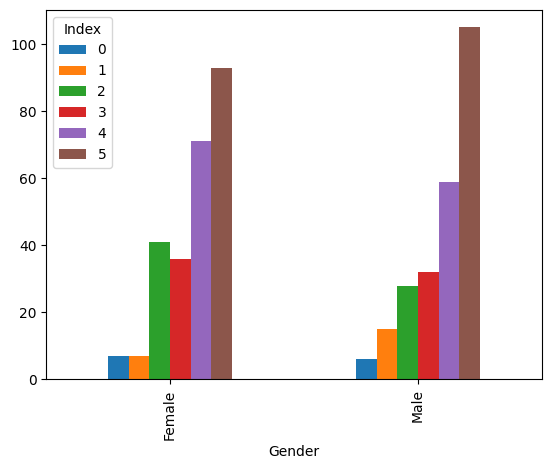

In [38]:
query = """Draw a bar plot to depict number of male and female categorised in each bmi Index """
results = agent(query)



> Entering new AgentExecutor chain...
plot
Thought: I need to visualize the data to find out if there are any outliers
Action: python_repl_ast
Action Input: df.boxplot(column=['Height', 'Weight'], by='Index', figsize=(10, 8))
Observation: [<Axes: title={'center': 'Height'}, xlabel='Index'>
 <Axes: title={'center': 'Weight'}, xlabel='Index'>]
Thought: I can see the boxplot now
Action: python_repl_ast
Action Input: plt.show()
Observation: NameError: name 'plt' is not defined
Thought: I need to import the matplotlib library
Action: python_repl_ast
Action Input: import matplotlib.pyplot as plt
Observation: 
Thought:

RateLimitError: ignored

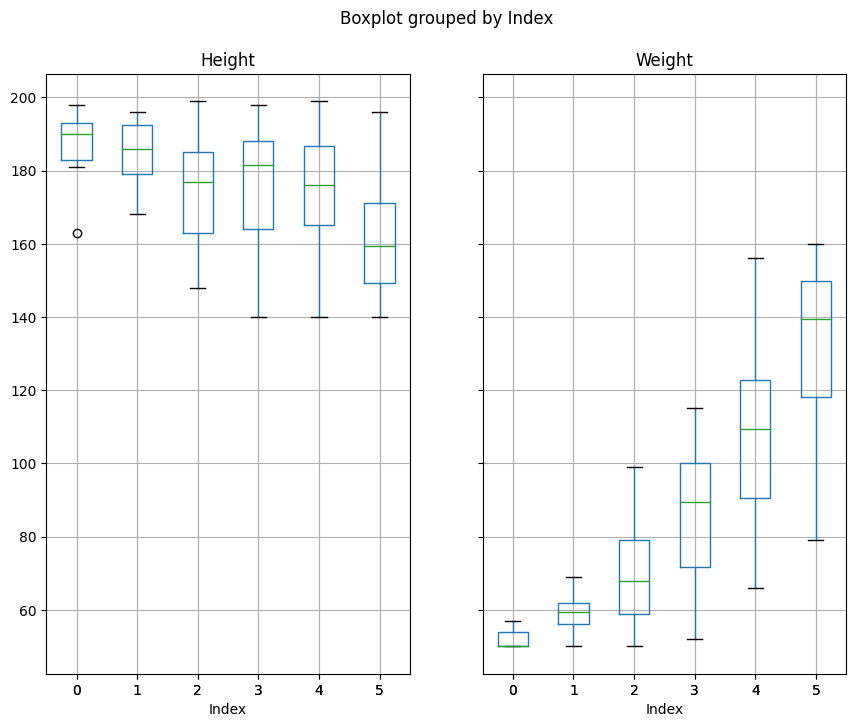

In [43]:
query = """Are there any outliers in terms of height and weight of those having bmi index greater than 3? find out using box """
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to get the data I need
Action: python_repl_ast
Action Input: df[(df['Gender'] == 'Male') & (df['Index'] > 3)]['Weight'].plot.kde()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought:

RateLimitError: ignored

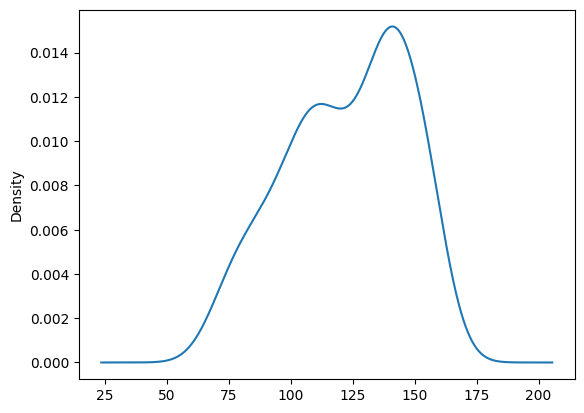

In [50]:
query = """Compare the probability distribution of weight between
male and female having bmi index greater than 3 using kde plot"""
results = agent(query)

In [54]:
query = """Do t-test for the following hypothesis.
Null Hypothesis: bmi index of male compared to female is same
Alternate Hypothesis: bmi index of male compared to female is not  same
"""
results = agent(query)



> Entering new AgentExecutor chain...

Thought: I need to calculate the mean of the BMI index for male and female
Action: python_repl_ast
Action Input: df.groupby('Gender')['Index'].mean()
Observation: Gender
Female    3.709804
Male      3.787755
Name: Index, dtype: float64
Thought: I need to calculate the t-test
Action: python_repl_ast
Action Input: stats.ttest_ind(df[df['Gender'] == 'Male']['Index'], df[df['Gender'] == 'Female']['Index'])
Observation: TtestResult(statistic=0.6426566277550879, pvalue=0.5207426869806135, df=498.0)
Thought:

RateLimitError: ignored



> Entering new AgentExecutor chain...
Thought: I need to filter the dataframe to get the data I need, then plot it.
Action: python_repl_ast
Action Input: df[(df['Gender'] == 'Male') & (df['Index'] > 3)]['Weight'].plot.kde()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I need to add the female data to the plot
Action: python_repl_ast
Action Input: df[(df['Gender'] == 'Female') & (df['Index'] > 3)]['Weight'].plot.kde()
Observation: Axes(0.125,0.11;0.775x0.77)
Thought: I need to add a legend, x and y labels
Action: python_repl_ast
Action Input: plt.legend(['Male', 'Female'])
plt.xlabel('Weight')
plt.ylabel('Probability Distribution')
Observation: Text(0, 0.5, 'Probability Distribution')
Thought:

RateLimitError: ignored

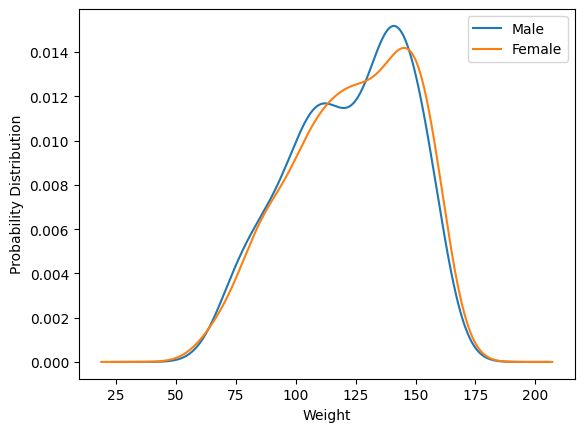

In [56]:
query = """Compare the probability distribution of male between
those who have bmi index greater than 3 and female between those who have bmi index greater than 3 using kde plot.
Create a lenged, x and y labels for the plot."""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to visualize the data
Action: python_repl_ast
Action Input: df.plot.scatter(x='Height', y='Weight')
Observation: Axes(0.125,0.11;0.775x0.77)
Thought:

RateLimitError: ignored

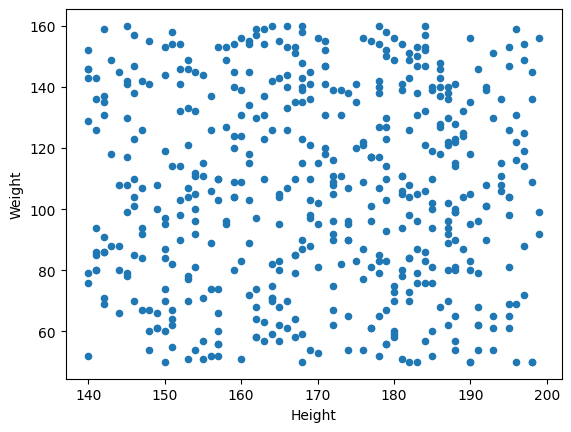

In [59]:
query = """Show the correlation between weight and height using a plot"""
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to create a plot that shows the correlation between index and weight for male vs female.
Action: python_repl_ast
Action Input: df.groupby('Gender').plot(x='Index', y='Weight', kind='scatter')
Observation: Gender
Female    Axes(0.125,0.11;0.775x0.77)
Male      Axes(0.125,0.11;0.775x0.77)
dtype: object
Thought: I now know the final answer
Final Answer: The plot shows the correlation between index and weight for male vs female.

> Finished chain.


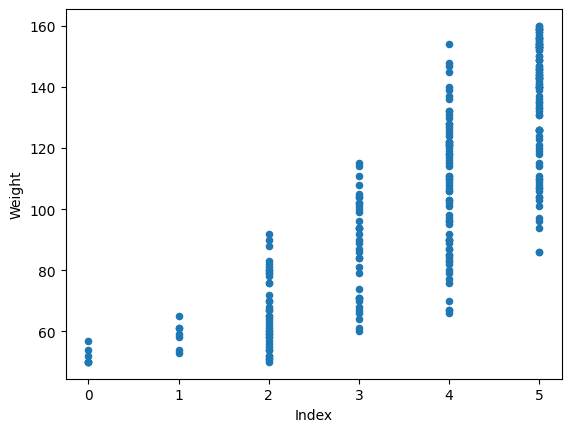

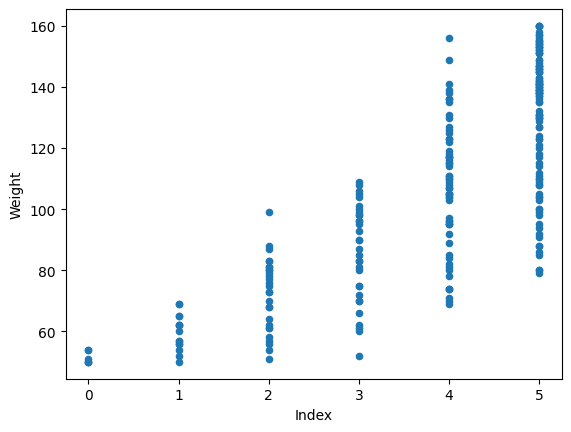

In [62]:
query = """Show the correlation between index and weight for  male vs female using a plot. """
results = agent(query)

In [66]:
query = """What is the correlation between variables """
results = agent(query)



> Entering new AgentExecutor chain...
Thought: I need to find the correlation between the variables
Action: python_repl_ast
Action Input: df.corr()
Observation:           Height    Weight     Index
Height  1.000000  0.000446 -0.422223
Weight  0.000446  1.000000  0.804569
Index  -0.422223  0.804569  1.000000
Thought:

<string>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


 I now know the correlation between the variables
Final Answer: The correlation between Height and Weight is 0.000446, between Height and Index is -0.422223, and between Weight and Index is 0.804569.

> Finished chain.




> Entering new AgentExecutor chain...
Thought: I need to visualize the correlation between the variables
Action: python_repl_ast
Action Input: df.corr()
Observation:         Gender    Height    Weight     Index
Gender     NaN       NaN       NaN       NaN
Height     NaN  1.000000  0.000446 -0.422223
Weight     NaN  0.000446  1.000000  0.804569
Index      NaN -0.422223  0.804569  1.000000
Thought: I need to visualize this correlation
Action: python_repl_ast
Action Input: import seaborn as sns; sns.heatmap(df.corr(), annot=True)
Observation: Axes(0.125,0.11;0.62x0.77)
Thought:

RateLimitError: ignored

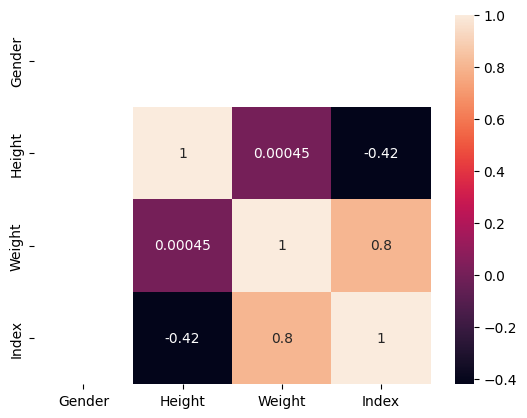

In [74]:
query = """ what is bmi dataframe variables like height ,weight, index correlation show using heat map"""
results = agent(query)